In [2]:
import pandas as pd
import numpy as np
import os
import json
import re
from datetime import date

In [3]:
# Reading DataSets

df_bang = pd.read_excel('bangalore_cars.xlsx')
df_chen = pd.read_excel('chennai_cars.xlsx')
df_del = pd.read_excel('delhi_cars.xlsx')
df_hyd = pd.read_excel('hyderabad_cars.xlsx')
df_jai = pd.read_excel('jaipur_cars.xlsx')
df_kol = pd.read_excel('kolkata_cars.xlsx')

In [4]:
# Converting the Columns Data from String to JSON format

import ast
def stringToDict(string):
    # Converting the data from String format to JSON format 
    return ast.literal_eval(str(string))

In [5]:
df_list = [df_bang, df_chen, df_del, df_hyd, df_jai, df_kol]
col_list = ['detail', 'overview', 'feature', 'specs']

for df in df_list:
    for col in col_list:
        
        # Converting the Dataframe column list into JSON format
        df[f'new_car_{col}'] = df[f'new_car_{col}'].apply(stringToDict)

In [6]:
df_list = [df_bang, df_chen, df_del, df_hyd, df_jai, df_kol]
col_list = ['detail', 'overview', 'feature', 'specs']
city_list = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata']


for df, city in zip(df_list, city_list):
    for col in col_list:
        
        # Exporting the Column Values to JSON file
        df[f'new_car_{col}'].to_json(f'new_car_{col}_{city}.json')

In [7]:
# Custom Function for reading JSON file
def json_file_load(file_name):
    file_path = file_name
    
    # Open and read the JSON file
    with open(file_path, 'r') as file:
        json_file = json.load(file)
        
    return json_file

In [8]:
city_list = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata']
col_list = ['detail', 'overview', 'feature', 'specs']
city_data = {}

for city in city_list:
    for num, col in zip(range(1, len(col_list)+1), col_list):
        
        # Storing JSON data of all columns of all Tables
        city_data[f'{city}_column{num}'] = json_file_load(f'new_car_{col}_{city}.json')

In [9]:
def extract_column1(jsonFile1, City):
    dictlist1 = []
    
    # Removing and Storing the 'trendingText' key value and Extracting the nested dictionaries
    for i in range(len(jsonFile1)):
        x = jsonFile1[str(i)].pop('trendingText')
        jsonFile1[str(i)].update(x)
        dictlist1.append(jsonFile1[str(i)])

    # Storing the resulting dictionary into a DataFrame
    df1 = pd.DataFrame(dictlist1)
    # Adding 'City' column to the Dataframe
    df1['City'] = City
    
    return df1

In [10]:
# Function for Extracting and storing in a Dataframe of SECOND Column Data 

def extract_column2(jsonFile2):
    dictlist2 = []

    # Extracting the 'top' key values and storing them in a dictionary
    for i in range(len(jsonFile2)):
        top_data = jsonFile2[str(i)]["top"] 
        dictionary = {item["key"]: item["value"] for item in top_data}
        dictlist2.append(dictionary)

    # Storing the resulting dictionary into a DataFrame
    df2 = pd.DataFrame(dictlist2)
    
    return df2

In [11]:
# Function for Extracting and storing in a Dataframe of THIRD Column Data 

def extract_column3(jsonFile3):
    dictlist3 = []

    # Looping through the whole file
    for i in range(len(jsonFile3)):
        defdict3 = {}

        # Extracting the 'top' key data and storing them in a dictionary 
        for j in range(len(jsonFile3[str(i)]['top'])):
            top_keys = jsonFile3[str(i)]['top'][j]['value'].split()[-1]
            top_value = jsonFile3[str(i)]['top'][j]['value']
            defdict3[top_keys]=top_value

        # Extracting the data of 'data' key and storing them in a dictionary
        for k in range(len(jsonFile3[str(i)]['data'])):
            for l in range(len(jsonFile3[str(i)]['data'][k]['list'])):
                data_keys = jsonFile3[str(i)]['data'][k]['list'][l]['value'].split()[-1]
                data_value = jsonFile3[str(i)]['data'][k]['list'][l]['value']
                defdict3[data_keys]=data_value
        dictlist3.append(defdict3)

    # Storing the resulting dictionary into a DataFrame
    df3 = pd.DataFrame(dictlist3)
    
    return df3

In [12]:
# Function for Extracting and storing in a Dataframe of FOURTH Column Data 

def extract_column4(jsonFile4):
    dictlist4 = []

    # Looping through the whole file
    for i in range(len(jsonFile4)):
        defdict4 = {}

        # Extracting the 'top' key data and storing them in a dictionary
        for j in range(len(jsonFile4[str(i)]['top'])):
            top_key = jsonFile4[str(i)]['top'][j]['key']
            top_value = jsonFile4[str(i)]['top'][j]['value']
            defdict4[top_key]=top_value

        # Extracting the data of 'data' key and storing them in a dictionary
        for k in range(len(jsonFile4[str(i)]['data'])):
            for l in range(len(jsonFile4[str(i)]['data'][k]['list'])):
                data_key = jsonFile4[str(i)]['data'][k]['list'][l]['key']
                data_value = jsonFile4[str(i)]['data'][k]['list'][l]['value']
                defdict4[data_key]=data_value
        dictlist4.append(defdict4)

    # Storing the resulting dictionary into a DataFrame
    df4 = pd.DataFrame(dictlist4)
    
    return df4

In [13]:
city_list = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata']

df_detail = {}
df_overview = {}
df_feature = {}
df_specs = {}

for city in city_list:

     # Storing of FIRST Column JSON Data of all Tables in a Dataframe 
    df_detail[f'df_{city}_detail'] = extract_column1(city_data[f'{city}_column1'], city)

     # Storing of SECOND Column JSON Data of all Tables in a Dataframe 
    df_overview[f'df_{city}_overview'] = extract_column2(city_data[f'{city}_column2'])

    # Storing of THIRD Column JSON Data of all Tables in a Dataframe 
    df_feature[f'df_{city}_feature'] = extract_column3(city_data[f'{city}_column3'])
    
    # Storing of FOURTH Column JSON Data of all Tables in a Dataframe 
    df_specs[f'df_{city}_specs'] = extract_column4(city_data[f'{city}_column4'])

In [14]:
df_detail_list = []
df_overview_list = []
df_feature_list = []
df_specs_list = []

for city in city_list:
    
    # Adding individual column dataframes into a list
    df_detail_list.append(df_detail[f'df_{city}_detail'])
    df_overview_list.append(df_overview[f'df_{city}_overview'])
    df_feature_list.append(df_feature[f'df_{city}_feature'])
    df_specs_list.append(df_specs[f'df_{city}_specs'])

# Concatenating the specific details of total cities data into a single specific detail Dataframe
df_detail_total = pd.concat(df_detail_list, ignore_index=True)
df_overview_total = pd.concat(df_overview_list, ignore_index=True)
df_feature_total = pd.concat(df_feature_list, ignore_index=True)
df_specs_total = pd.concat(df_specs_list, ignore_index=True)

In [15]:
total_list = [df_detail_total, df_overview_total, df_feature_total, df_specs_total]
df = pd.concat(total_list, axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 181 entries, it to Ground Clearance Unladen
dtypes: float64(3), int64(4), object(174)
memory usage: 11.6+ MB


In [17]:
df.sample(5)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen
3590,0,Petrol,SUV,"3,500",Manual,1,1st Owner,Hyundai,Hyundai Creta,2022,...,Disc,Disc,NaN,NaN,"Tubeless, Radial",5,NaN,17,17,NaN
1360,0,Petrol,SUV,"54,639",Manual,1,1st Owner,Hyundai,Hyundai Creta,2017,...,Disc,Drum,185 Kmph,11.2 Seconds,Tubeless,5,400-litres,17,17,NaN
4810,0,Petrol,SUV,"70,000",Automatic,1,1st Owner,Honda,Honda CR-V,2012,...,Ventilated Disc,Disc,NaN,NaN,"Tubeless,Radial",5,NaN,17,17,NaN
7490,0,Diesel,Hatchback,"73,000",Manual,1,1st Owner,Maruti,Maruti Baleno,2018,...,Disc,Drum,170 Kmph,12.93 seconds,"Tubeless,Radial",5,339-litres,NaN,NaN,NaN
8261,0,Petrol,SUV,"55,000",Manual,1,1st Owner,Hyundai,Hyundai Creta,2018,...,Disc,Drum,165 Kmph,10.5 Seconds,Tubeless,5,400-litres,NaN,NaN,NaN


In [18]:
# DATA CLEANING with PANDAS

In [19]:
# PriceActual, PriceSaving, PriceFixedText columns have no values. So, the three columns have to be dropped.
# oem column values are in model column. So, the 'oem' column has to be dropped.
# ft and Fuel Type columns are duplicate columns. So, 'ft' column has to be dropped.
# OwnerNo, Owner and Ownership columns are duplicate columns. So, 'owner' and 'ownership' columns have to be dropped.
# it, ImgUrl, Heading and Desc columns have single values which are irrelevant to the analysis. So, the columns have to be dropped.
# km and KmsDriven columns are duplicate columns. So, the 'KmsDriven' column has to be dropped.
# Transmission and transmission columns are duplicated. So, the 'transmission' column has to be dropped.
# Year of Manufacture and modelYear columns are duplicate columns. So, the 'modelYear' column has to be dropped.
# Alloy Wheel Size and Wheel Size columns have duplicated. So, 'the Wheel Size' column has to be dropped.
# 'Engine Displacement','Engine' and 'Displacement' columns have same values. So, the 'Engine Displacement' and 'Engine' columns have to be dropped.
# 'Max Torque' and 'Torque' columns have same values. So, the 'Max Torque' column has to be dropped.
# centralvariantID and variantName columns are representing same information. So, the centralvariantID column have to be dropped.

In [20]:
df = df.drop(columns=['it', 'ft', 'oem', 'priceActual', 'priceSaving', 'Wheel Size', 'priceFixedText', 'owner', 'Ownership', 'Engine Displacement',
                      'Engine', 'Max Torque', 'imgUrl', 'heading', 'desc', 'Kms Driven', 'transmission', 'modelYear', 'car_links', 'centralVariantId'], 
                      axis=1, errors='ignore')

In [21]:
# 'Seats' column has duplicate columns. So, the last column has to be retained.
duplicates = df.columns.duplicated(keep='last')
df = df.loc[:, ~duplicates]

In [22]:
# Seating Capacity and Seats columns are duplicated. So, the Seating Capacity column has to be dropped.
df = df.drop(columns=['Seating Capacity'], axis=1)

In [23]:
def extract_number(value):
    try:
        
        # Coverting the column vale to string format
        value_str = str(value)

        # Splitting the string value into numerical value by using the regex expressions 
        number_str = re.split(r'[^\d.]+', value_str)[0]  # Keep digits and decimal points
        
        return float(number_str) if number_str else float('nan')
        
    except (ValueError, IndexError):
        
        return float('nan')

In [24]:
num_col_list = ['Alloy Wheel Size', 'Cargo Volumn', 'Acceleration', 'Top Speed', 'Turning Radius', 'Gear Box', 'Kerb Weight', 'Max Power', 
                'Rear Tread', 'Front Tread', 'Wheel Base', 'Height', 'Width', 'Length', 'Displacement', 'Seats', 'Mileage', 'Torque']
for col in num_col_list:
    df[col] = df[col].apply(extract_number)

In [25]:
def transform(value):
    try:
        value_str = str(value)

        # Keep digits and decimal points
        number_str = re.split(r'\s+', value_str)[1] 
        
        return float(number_str) if number_str else float('nan')
        
    except (ValueError, IndexError):

        # Converting thousand values to lakhs
        value_new = float(re.split(r',+', number_str)[0])/100
        
        return value_new

df['price'] = df['price'].apply(transform)

In [26]:
df['km'] = df['km'].apply(lambda value: float(value.replace(',','')))

In [27]:
df = df.rename(
        columns={ 'bt': 'Body Type',
                  'km': 'Driven(KM)',
                  'ownerNo': 'No of Owner',
                  'Mileage': 'Mileage(KM)',
                  'model': 'Brand(Model)',
                  'price': 'Price(Lakhs)',
                  'variantName': 'Variant Name',
                  'Alloy Wheel Size': 'Wheel Size',
                  'Top Speed': 'Top Speed(KMPH)',
                  'Kerb Weight': 'Kerb Weight(KG)',
                  'Length': 'Length(mm)',
                  'Width': 'Width(mm)',
                  'Height': 'Height(mm)',
                  'Wheel Base': 'Wheel Base(mm)'
                }
          )

In [28]:
df.iloc[:3]

,Body Type,Driven(KM),No of Owner,Brand(Model),Variant Name,Price(Lakhs),City,Registration Year,Insurance Validity,Fuel Type,...,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed(KMPH),Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Ground Clearance Unladen
0,Hatchback,120000.0,3,Maruti Celerio,VXI,4.00,Bangalore,2015,Third Party insurance,Petrol,...,4.7,Ventilated Disc,Drum,150.0,15.05,"Tubeless, Radial",5,235.0,NaN,NaN
1,SUV,32706.0,2,Ford Ecosport,1.5 Petrol Titanium BSIV,8.11,Bangalore,Feb 2018,Comprehensive,Petrol,...,5.3,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352.0,16.0,NaN
2,Hatchback,11949.0,1,Tata Tiago,1.2 Revotron XZ,5.85,Bangalore,Sept 2018,Comprehensive,Petrol,...,4.9,Disc,Drum,150.0,14.30,Tubeless,5,242.0,14.0,NaN


In [29]:
df['Age(Months)'] = df['Year of Manufacture'].apply(lambda x: 2024-x)

In [30]:
df = df.drop(columns=['Year of Manufacture'])

In [31]:
# The columns with more than 95% same values has no proper contribution to the model.
# So, the columns have to be dropped

In [32]:
same_value_threshold = 0.95
same_value_drop_list = [col for col in df.columns if df[col].value_counts(normalize=True).values[0] > same_value_threshold]
same_value_drop_list

['Conditioner',
 'Heater',
 'Mirror',
 'Locking',
 'Locks',
 'Outlet',
 'Odometer',
 'Tripmeter',
 'Upholstery',
 'Compartment',
 'Clock',
 'Covers',
 'Grille',
 'Belts',
 'Tank',
 'Immobilizer',
 'Device',
 'Entry',
 'Button',
 'Net',
 'Tachometer',
 'Display',
 'Seat',
 'Washer',
 'Defogger',
 'Wheels',
 'Indicators',
 'Rail',
 'Sensor',
 'Ebd',
 'Camera',
 'Seatbelts',
 'Airbags',
 'Radio',
 'Audio',
 'Input',
 'Bluetooth',
 'Screen',
 'Speaker',
 'Cooling',
 'Eco',
 'Glass',
 'Spoiler',
 'Garnish',
 'Lamp',
 'Rest',
 'ACVents',
 'Support',
 'Saver',
 'Alarm',
 'Lamps',
 'Mounts',
 'Ajar',
 'Paddles',
 'LEDTaillights',
 'Lighter',
 'Modes',
 'Cancellation',
 'Tailgate',
 'Dashboard',
 'Selector',
 'Colour',
 'LEDDRLs',
 'LEDHeadlights',
 'Foglamps',
 'Windows',
 'Play',
 'Auto',
 'Link',
 'Charging',
 'Compass',
 'Size',
 'Changer',
 'Boot',
 'Table',
 'Storage',
 'Stop',
 'View360Camera',
 'Stepper',
 'Assistance',
 'Location',
 'Connectivity',
 'Washers',
 'Tracking',
 'Carrier',


In [33]:
df = df.drop(columns = same_value_drop_list, axis=1)

In [34]:
# The columns with more than 50% missing values have no proper contribution to the model.
# So, the columns have to be dropped

In [35]:
missing_value_threshold = 0.5
missing_value_drop_list = [col for col in df.columns if df[col].isna().mean() > missing_value_threshold]
missing_value_drop_list

['Player',
 'Indicator',
 'Wiper',
 'Lock',
 'Roof',
 'Assist',
 'Monitor',
 'Alert',
 'BoreX Stroke',
 'Compression Ratio',
 'Gross Weight',
 'Ground Clearance Unladen']

In [36]:
df = df.drop(columns = missing_value_drop_list, axis=1)

In [37]:
# Registration Year, Insurance Validity columns will not affect the target column much.
# Tyre Type column has 95% same values which is not contributing much for the model.
# So, the columns have to be dropped.

In [38]:
df = df.drop(columns=['Registration Year', 'Insurance Validity', 'Tyre Type'], errors='ignore')

In [63]:
df.describe()

,Driven(KM),No of Owner,Price(Lakhs),Mileage(KM),Max Power,Torque,Seats,Displacement,No of Cylinder,Length(mm),...,Front Tread,Rear Tread,Kerb Weight(KG),Gear Box,Turning Radius,Top Speed(KMPH),Acceleration,Cargo Volumn,Wheel Size,Age(Months)
count,8.369000e+03,8369.000000,8369.000000,8082.000000,8309.000000,8309.000000,8363.000000,8365.000000,8338.000000,8290.000000,...,4811.000000,4799.000000,8309.000000,8035.000000,6769.000000,4579.000000,4838.000000,6776.000000,5045.000000,8349.000000
mean,5.897430e+04,1.360139,9.146958,19.255853,105.198818,177.824380,5.203276,1424.735923,3.802471,4072.554282,...,1458.461858,1459.161075,1178.090143,5.481269,6.026417,175.711088,12.870949,361.887102,15.664024,7.452150
std,7.406100e+04,0.641958,10.614942,4.030644,46.399973,109.859016,0.663789,477.629144,0.594613,531.933016,...,191.414627,193.571193,363.989105,0.934228,75.906011,27.390274,3.366996,124.332409,1.538014,3.811882
min,0.000000e+00,0.000000,0.200000,7.080000,25.400000,4.800000,2.000000,0.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,4.000000,4.000000,80.000000,3.700000,29.000000,12.000000,1.000000
25%,3.000000e+04,1.000000,3.980000,17.000000,78.900000,110.000000,5.000000,1197.000000,4.000000,3775.000000,...,1440.000000,1440.000000,925.000000,5.000000,4.800000,158.000000,10.500000,268.000000,15.000000,5.000000
50%,5.369200e+04,1.000000,6.000000,18.900000,88.700000,140.000000,5.000000,1248.000000,4.000000,3995.000000,...,1490.000000,1495.000000,1100.000000,5.000000,5.100000,170.000000,12.900000,350.000000,16.000000,7.000000
75%,8.000000e+04,2.000000,9.500000,21.500000,118.410000,215.000000,5.000000,1498.000000,4.000000,4425.000000,...,1530.000000,1530.000000,1315.000000,6.000000,5.300000,190.000000,14.700000,460.000000,17.000000,10.000000
max,5.500000e+06,5.000000,96.000000,140.000000,576.630000,850.000000,10.000000,5000.000000,23.000000,5462.000000,...,1705.000000,1834.000000,2962.000000,10.000000,6250.000000,310.000000,44.040000,1728.000000,21.000000,22.000000


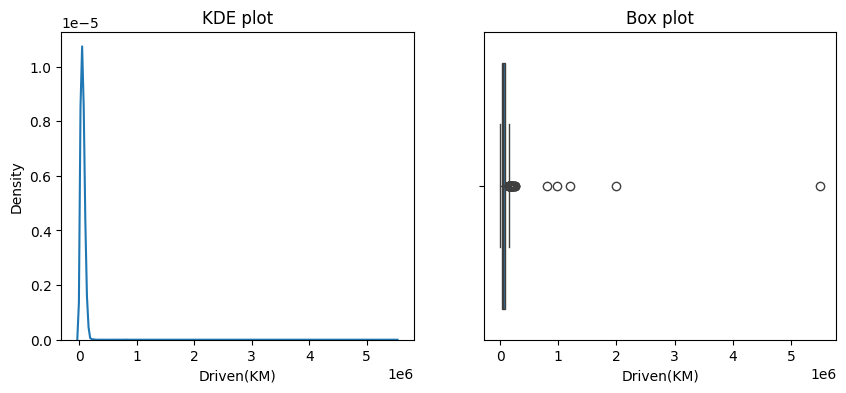

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.kdeplot(data = df, x='Driven(KM)', ax=ax[0])
ax[0].set_title('KDE plot')

sns.boxplot(data = df, x='Driven(KM)', ax=ax[1])
ax[1].set_title('Box plot')

plt.show()

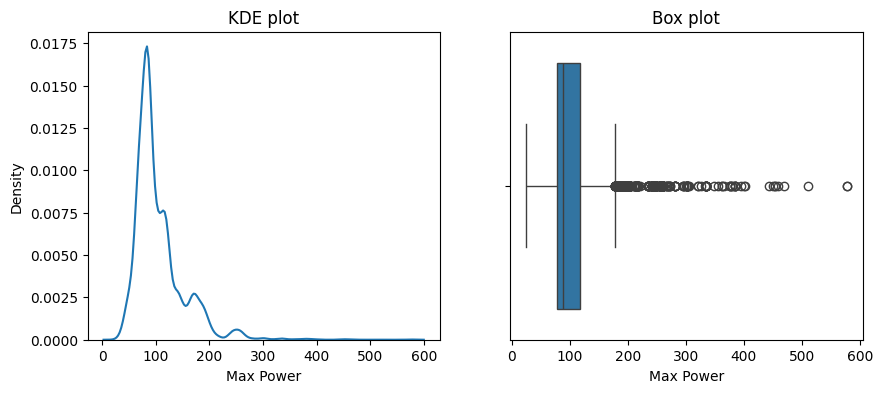

In [43]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.kdeplot(data = df, x='Max Power', ax=ax[0])
ax[0].set_title('KDE plot')

sns.boxplot(data = df, x='Max Power', ax=ax[1])
ax[1].set_title('Box plot')

plt.show()

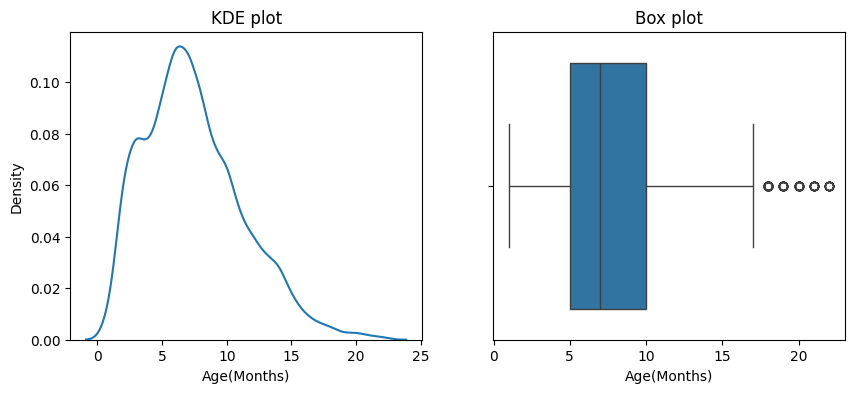

In [45]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.kdeplot(data = df, x='Age(Months)', ax=ax[0])
ax[0].set_title('KDE plot')

sns.boxplot(data = df, x='Age(Months)', ax=ax[1])
ax[1].set_title('Box plot')

plt.show()

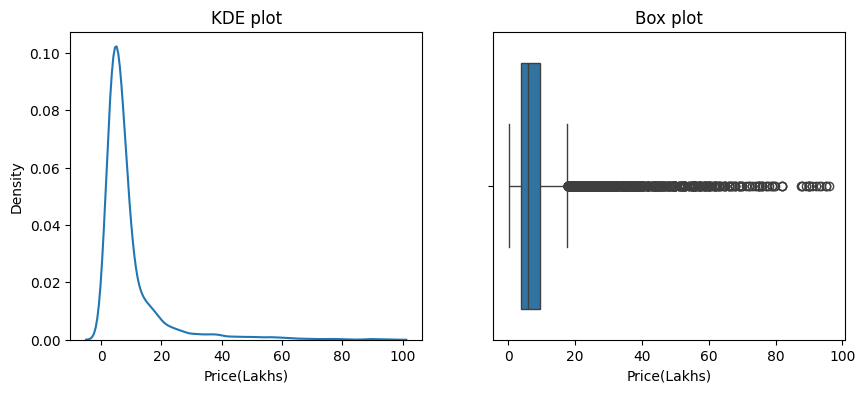

In [62]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

sns.kdeplot(data = df, x='Price(Lakhs)', ax=ax[0])
ax[0].set_title('KDE plot')

sns.boxplot(data = df, x='Price(Lakhs)', ax=ax[1])
ax[1].set_title('Box plot')

plt.show()

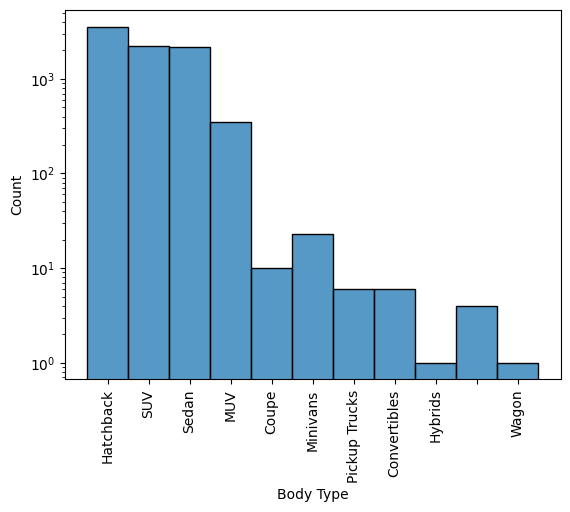

In [48]:
sns.histplot(data = df, x='Body Type', log=True)
plt.xticks(rotation='vertical')
plt.show()

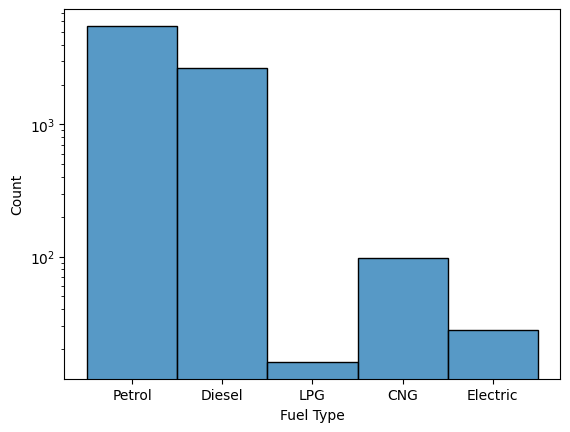

In [55]:
sns.histplot(data = df, x='Fuel Type', log=True)
plt.show()

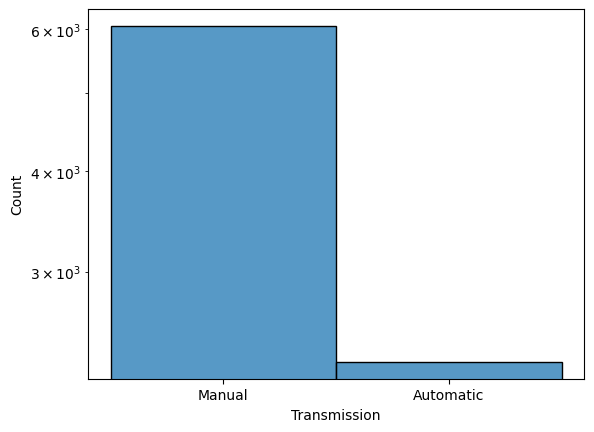

In [56]:
sns.histplot(data = df, x='Transmission', log=True)
plt.show()

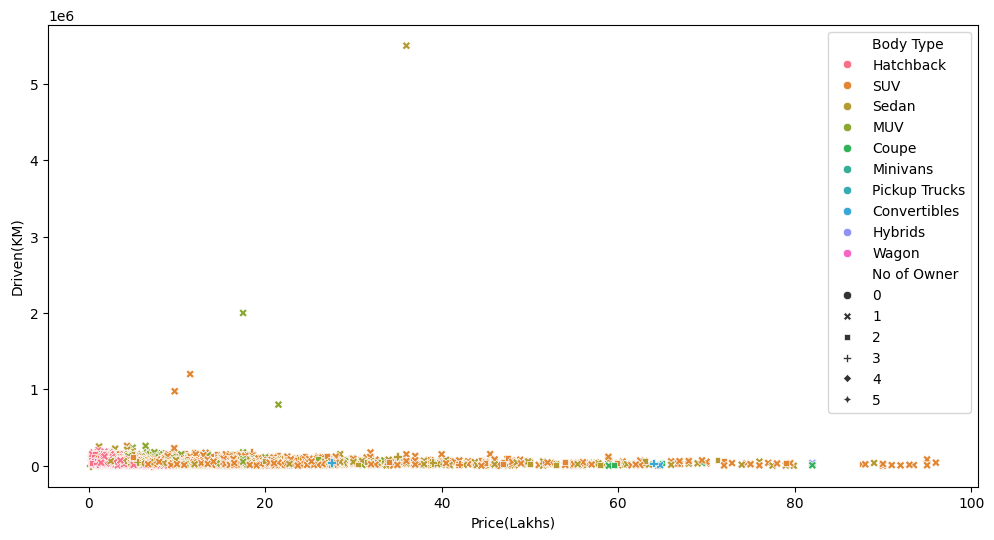

In [61]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Price(Lakhs)', y='Driven(KM)', hue='Body Type', style='No of Owner')
plt.show()

<Axes: xlabel='Brand(Model)', ylabel='City'>

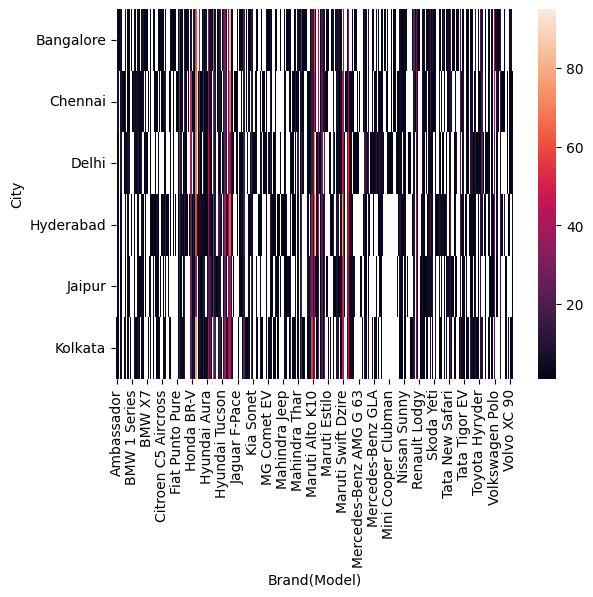

In [58]:
engine_brand = df.pivot_table(index='City', columns='Brand(Model)', aggfunc='size')
sns.heatmap(engine_brand)

In [40]:
df.to_csv('cleanedData.csv')